In [9]:
#Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import sys
#import cv2 as cv
from PIL import Image
import itertools
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [10]:
# Import data from "sign_mnist_test.csv"
data=pd.read_csv("sign_mnist_train.csv")     # [27455 rows x 785 columns] --> Type : <class 'pandas.core.frame.DataFrame'>
data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [11]:
# Transform <class 'pandas.core.frame.DataFrame'> to <class 'numpy.ndarray'>
data = data.to_numpy()                 # np_array = [[6 149 149 ... 112 120 107]..[2 173 174 ... 195 193 192]] --> (7172, 785) --> Type : <class 'numpy.ndarray'>
print("Data with label (27455, 785)")
print(data, "\n")

Data with label (27455, 785)
[[  3 107 118 ... 204 203 202]
 [  6 155 157 ... 103 135 149]
 [  2 187 188 ... 195 194 195]
 ...
 [ 18 174 174 ... 202 200 200]
 [ 17 177 181 ...  64  87  93]
 [ 23 179 180 ... 205 209 215]] 



#### Obter array das labels > *label* 

In [12]:
# Get array of labels (first column of data)
print("Array of labels ")
labels = data[:,0]
#y = y.reshape(7172,1)
#print(list(set(y[:, 0])))  #[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
print(labels, "\n")
print(labels.shape)

Array of labels 
[ 3  6  2 ... 18 17 23] 

(27455,)


#### Obter dados com *a* = 30

In [79]:
# Get number of testing examples
for i in range(data.shape[0]):
    if (data[i][0] == 0):
        data[i][0] = 30
    #print(data[i])

#### Obter array sem labels > *data_withoutLabel* 

In [ ]:
# Get array without labels -> (27455, 784)
dataWoutLabel = np.empty(shape=[0, 784])
for i in range(27455):
    npArr = data[i]
    npArr = npArr[1:]
    npArr = npArr.reshape(1,784)
    dataWoutLabel = np.append(dataWoutLabel, npArr, axis=0)
print("Data without label (27455, 784)")
print(dataWoutLabel, "\n\n")

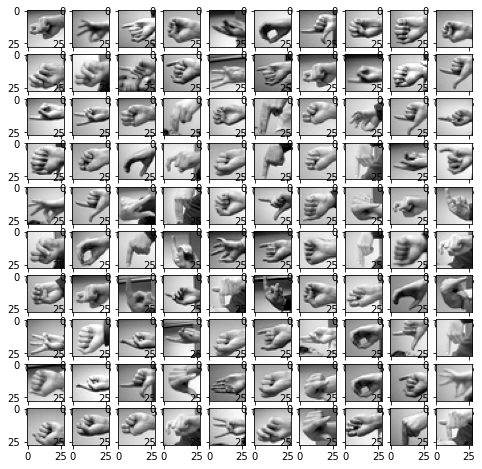

In [71]:
fig, axis = plt.subplots(10,10,figsize=(8,8))

for i in range(10):
    for j in range(10):
        axis[i,j].imshow(dataWoutLabel[np.random.randint(0,27455),:].reshape(28,28,order="F"), cmap="gray") 

In [ ]:
# selecionar apenas as vogais : 30 (a), 4 (e), 8 (i), 14 (o), 20 (u)  
vogal = (labels==30) or (labels==4) or (labels==8) or (labels==14) or (labels==20)
# selecionar apenas as consoantes
consoante = (labels!=30) and (labels!=4) and (labels!=8) and (labels!=14) and (labels!=20)

print(vogal)
print(consoante)
print(dataWoutLabel.shape)

# desenhar grafico
plt.scatter(dataWoutLabel[vogal[:,0],0],dataWoutLabel[vogal[:,0],1],c="r",marker="+")
plt.scatter(dataWoutLabel[consoante[:,0],0],dataWoutLabel[consoante[:,0],1],c="b",marker="o")
plt.legend(["Vogal","Consoante"])

In [25]:
# Test C = 1
classifier = SVC(C=1, kernel="linear")
classifier.fit(dataWoutLabel,np.ravel(label))
print(classifier.score(dataWoutLabel,label))

1.0


In [18]:
classifier.predict(dataWoutLabel[-1:])

array([2], dtype=int64)

(7172, 1)
(7172, 1)
(7172, 1)
(100, 100)
(100, 100)
(10000,)


ValueError: X.shape[1] = 2 should be equal to 784, the number of features at training time

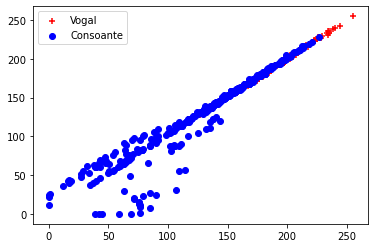

In [50]:
#vog = ((y==25) or (y==5) or (y==9) or (y==15) or (y==21))
#vog = (y==25, y==5,y==9,y==15,y==21)
#con = (y!=25 and y!=5 and y!=9 and y!=15 and y!=21)

#vog = 1 if ((y==25) or (y==5) or (y==9) or (y==15) or (y==21)) else 0

#con = 1 if (y!=25 and y!=5 and y!=9 and y!=15 and y!=21) else 0

#if (y==25):
#    vog = 1
#elif ((y==5)):
#    vog = 1
#elif ((y==9)):
#    vog = 1
#elif ((y==15)):
#    vog = 1
#elif ((y==21)):
#    vog = 1
#else:
#    vog = 0
#y = y.reshape(7172,1)
vog = (label == 25)#a
con = (label == 1) #b
plt.scatter(dataWoutLabel[vog[:,0],0],dataWoutLabel[vog[:,0],1],c="r",marker="+")
plt.scatter(dataWoutLabel[con[:,0],0],dataWoutLabel[con[:,0],1],c="b",marker="o")
plt.legend(["Vogal","Consoante"])

num=100
Z_1,Z_2 = np.meshgrid(np.linspace(dataWoutLabel[:,0].min(),dataWoutLabel[:,1].max(),num),np.linspace(dataWoutLabel[:,1].min(),dataWoutLabel[:,1].max(),num))
print(Z_1.shape)
print(Z_2.shape)
print(Z_1.ravel().shape)
plt.contour(Z_1,Z_2,classifier.predict(np.array([Z_1.ravel(),Z_2.ravel()]).T).reshape(Z_1.shape),1,colors="y")

In [22]:
# Test C = 100
classifier2 = SVC(C=100, kernel="linear")
classifier2.fit(data_withoutLabel[:-1],label[:-1])
print(classifier2.score(data_withoutLabel[:-1],label[:-1]))

1.0


In [23]:
classifier2.predict(data_withoutLabel[-1:])

array([2], dtype=int64)

ValueError: X.shape[1] = 2 should be equal to 784, the number of features at training time

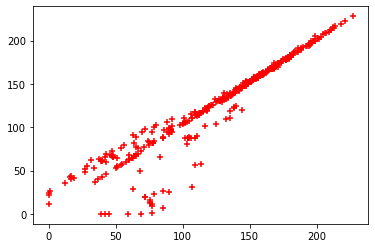

In [47]:
pos=(label==1)
neg=(label==0)
plt.scatter(data_withoutLabel[pos[:,0],0],data_withoutLabel[pos[:,0],1],c="r",marker="+")
plt.scatter(data_withoutLabel[neg[:,0],0],data_withoutLabel[neg[:,0],1],c="b",marker="o")
#plt.legend(["Positive examples","Negative examples"])
# plotting the decision boundary
X_3,X_4 = np.meshgrid(np.linspace(data_withoutLabel[:,0].min(),data_withoutLabel[:,1].max(),num=100),np.linspace(data_withoutLabel[:,1].min(),data_withoutLabel[:,1].max(),num=100))
plt.contour(X_3,X_4,classifier2.predict(np.array([X_3.ravel(),X_4.ravel()]).T).reshape(X_3.shape),1,colors="y")
#plt.xlim(0,4.5)
#plt.ylim(1.5,5)